In [1]:
import sys
sys.path.append("../src/")
from wiroobs import WIROObs
from image_utils import assemble_fullpath

In [2]:
import fitsio

In [3]:
wiro = WIROObs()

In [4]:
input_dir = "/Users/yufengluo/Research/desi/wiro-data/20220929"
output_dir = "/Users/yufengluo/Research/desi/wiro-data/20220929_test"
bias = [f"a{i:>03d}.fit" for i in range(119, 124)]
flat_filters = {}
flats = [f"f{i:>03d}.fit" for i in (1, 2, 4, 5, 8, 9, 10)]
for img in assemble_fullpath(input_dir, flats):
    header = fitsio.read_header(img)
    # filter name is the string after column
    # Filter 5: i' 54605
    fitlername = header["FILTER"].rsplit(":")[-1].strip()
    if fitlername not in list(flat_filters.keys()):
        flat_filters[fitlername] = []
    flat_filters[fitlername].append(img.name)

In [5]:
sci_filters = {}
science = [f"a{i:>03d}.fit" for i in range(75, 93)] + [f"a{i:>03d}.fit" for i in (112, 113, 115, 116, 117, 118)]\
        + [f"a{i:>03d}.fit" for i in (125, 126, 127, 128, 131, 132, 133, 134)]
for img in assemble_fullpath(input_dir, science):
    header = fitsio.read_header(img)
    # filter name is the string after column
    # Filter 5: i' 54605
    fitlername = header["FILTER"].rsplit(":")[-1].strip()
    if fitlername not in list(sci_filters.keys()):
        sci_filters[fitlername] = []
    sci_filters[fitlername].append(img.name)

In [6]:
dark = [f"d{i:>03d}.fit" for i in range(1, 4)] \
        + [f"a{i:>03d}.fit" for i in (106, 114, 124, 129, 130, 135)]

In [7]:
wiro.from_lists(sci_dict=sci_filters, flat_dict=flat_filters, dark_filelist=dark,
                bias_filelist=bias, input_dir=input_dir, output_dir=output_dir)


In [11]:
wiro.remove_bad_images()

In [12]:
print(wiro)

All images: 
{ 'bad_images': [],
  'bias': ['a119.fit', 'a120.fit', 'a121.fit', 'a122.fit', 'a123.fit'],
  'dark': [ 'd001.fit', 'd002.fit', 'd003.fit', 'a106.fit', 'a114.fit',
            'a124.fit', 'a129.fit', 'a130.fit', 'a135.fit'],
  'flat_A 54195': ['f010.fit'],
  'flat_C 14859': ['f004.fit', 'f005.fit'],
  'flat_D 27981': ['f008.fit'],
  'flat_E 41102': ['f009.fit'],
  'flat_g 1736': ['f001.fit', 'f002.fit'],
  'sci_A 54195': ['a133.fit', 'a134.fit'],
  'sci_C 14859': [ 'a115.fit', 'a116.fit', 'a117.fit', 'a118.fit', 'a125.fit',
                   'a126.fit'],
  'sci_D 27981': ['a127.fit', 'a128.fit'],
  'sci_E 41102': ['a131.fit', 'a132.fit'],
  'sci_g 1736': [ 'a075.fit', 'a076.fit', 'a077.fit', 'a078.fit', 'a079.fit',
                  'a080.fit', 'a081.fit', 'a082.fit', 'a083.fit', 'a084.fit',
                  'a085.fit', 'a086.fit', 'a087.fit', 'a088.fit', 'a089.fit',
                  'a090.fit', 'a091.fit', 'a092.fit', 'a112.fit', 'a113.fit']}
Science filters: ['g 1736'

In [13]:
wiro.overscan_sub_trim()

In [8]:
wiro.done_overscan = True

In [10]:
wiro.bias_sub()

INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: splitting each image into 4 chunks to limit memory usage to 350000000.0 bytes. [ccdproc.combiner]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


In [ ]:
wiro.images_dict["sci_A 54195"]

In [12]:
from pathlib import Path
from astropy.nddata import CCDData

ccd_im = CCDData.read(assemble_fullpath(wiro.output_dir, wiro.images_dict["sci_A 54195"][0], "z"))

In [32]:
mask = ccd_im.data < 600

In [36]:
import numpy as np

In [39]:
np.where(mask)[0]

array([   0,    0,    0, ..., 4095, 4095, 4095])

In [43]:
ccd_im.data[mask] = 0

In [44]:
ccd_im

CCDData([[   0,  623,  661, ...,    0,  625,  605],
         [ 605,  631,  673, ...,  717,  716,  711],
         [ 611,  629,  627, ...,  693,  716,  730],
         ...,
         [ 660,  648,  604, ...,  733,  706,  748],
         [ 606,  608,    0, ...,  855,  782,  771],
         [   0,    0,    0, ..., 1310,  826,  661]], unit='adu')

In [23]:
import image_utils

In [25]:
import importlib
importlib.reload(image_utils)
from image_utils import assemble_fullpath

In [28]:
assemble_fullpath(wiro.output_dir, wiro.images_dict["sci_A 54195"][0], "z")

PosixPath('/Users/yufengluo/Research/desi/wiro-data/20220929_test/a133_z.fit')

In [13]:
im = CCDData.read(assemble_fullpath(wiro.output_dir,"a132_zb.fit" ))

In [15]:
im.uncertainty

StdDevUncertainty([[119.74974 , 134.287   ,  64.52906 , ..., 118.186295,
                    252.20825 , 118.186295],
                   [  0.      ,   0.      ,   1.      , ...,   0.      ,
                      0.      ,   0.      ],
                   [  1.      ,   1.      ,   0.      , ...,   0.      ,
                      0.      ,   0.      ],
                   ...,
                   [  0.      ,   0.      ,   0.      , ...,   0.      ,
                      1.      ,   0.      ],
                   [  0.      ,   0.      ,   1.      , ...,   0.      ,
                      0.      ,   0.      ],
                   [231.62038 , 241.59677 , 106.433075, ..., 184.93512 ,
                    197.6765  , 167.82133 ]])

In [8]:
wiro.done_bias = True
wiro.done_overscan = True

INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
Mean: 0.6401987075805664 Std: 0.4799419989881473 Median: 1.0 RMS: 0.8001241825995302 Min: 0 Max: 1


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
Mean: 0.6763067841529846 Std: 0.4678845133808443 Median: 1.0 RMS: 0.8223787352266501 Min: 0 Max: 1


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
Mean: 0.6560948491096497 Std: 0.4750100180951283 Median: 1.0 RMS: 0.8099968204318149 Min: 0 Max: 2


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
Mean: 0.6579355001449585 Std: 0.4744011983577192 Median: 1.0 RMS: 0.8111322334520793 Min: 0 Max: 2


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
Mean: 0.6635656356811523 Std: 0.4724894526063207 Median: 1.0 RMS: 0.8145953815736696 Min: 0 Max: 1


/usr/local/Caskroom/miniconda/base/envs/py39/lib/python3.9/site-packages/astropy/units/quantity.py:613: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/usr/local/Caskroom/miniconda/base/envs/py39/lib/python3.9/site-packages/astropy/nddata/nduncertainty.py:650: RuntimeWarning: invalid value encountered in true_divide
  return from_variance((left + right + correlation_sign * corr) /
/usr/local/Caskroom/miniconda/base/envs/py39/lib/python3.9/site-packages/astropy/units/quantity.py:613: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


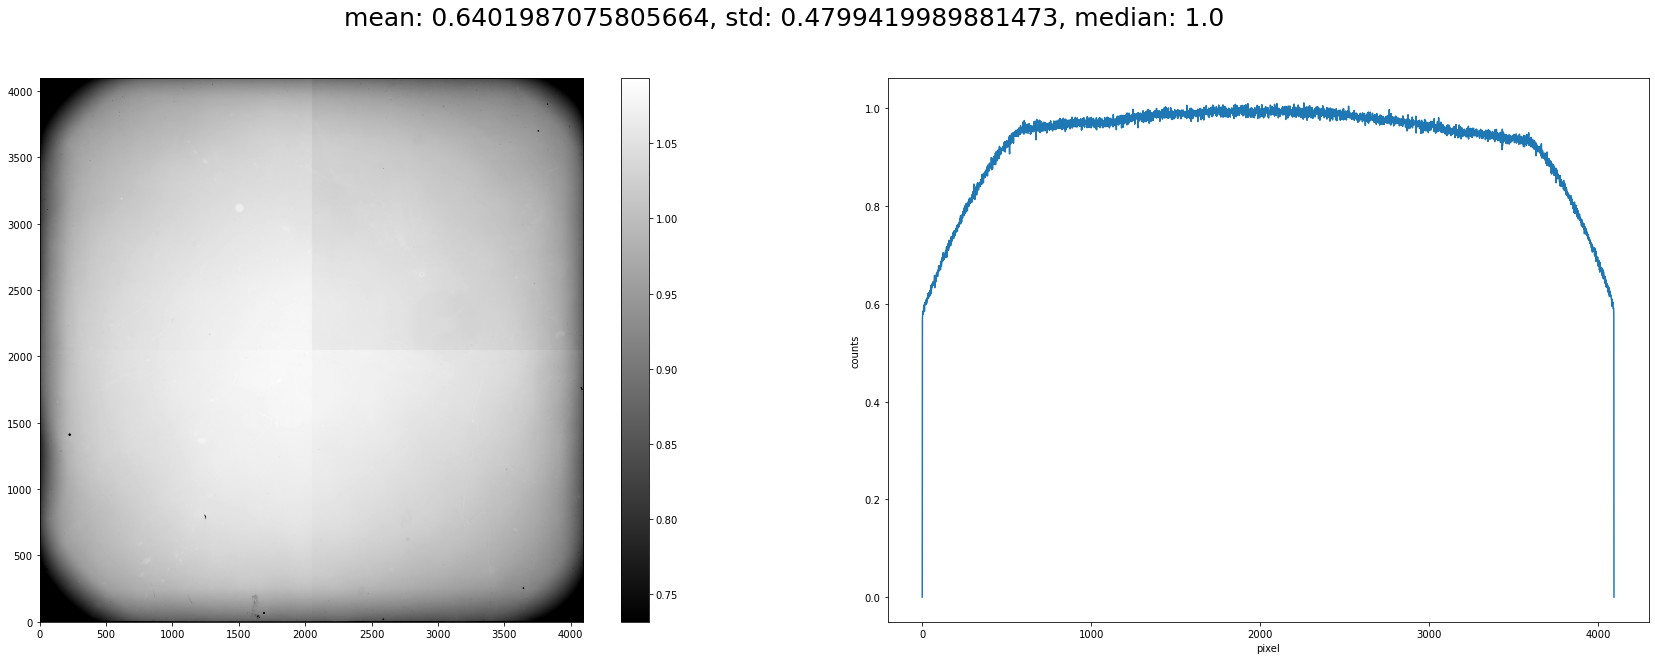

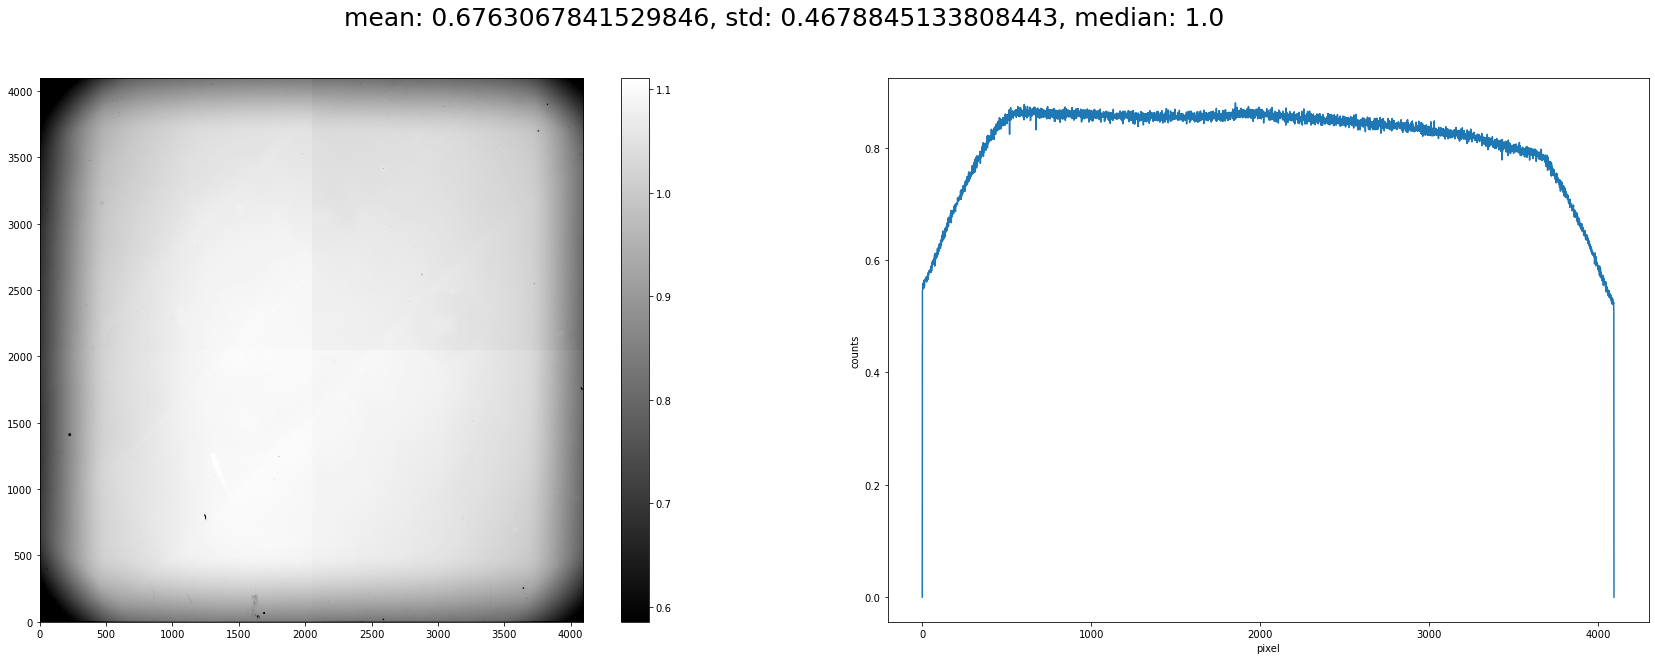

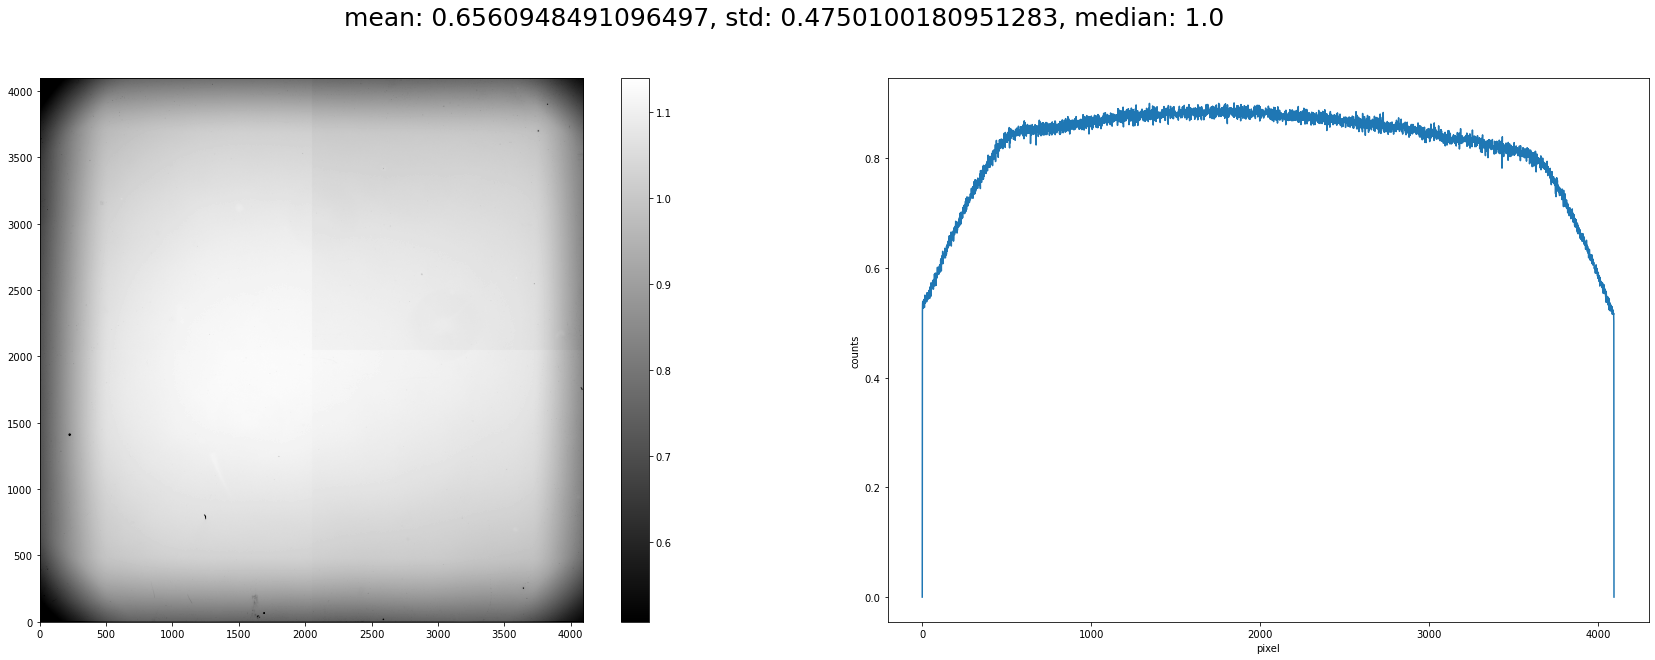

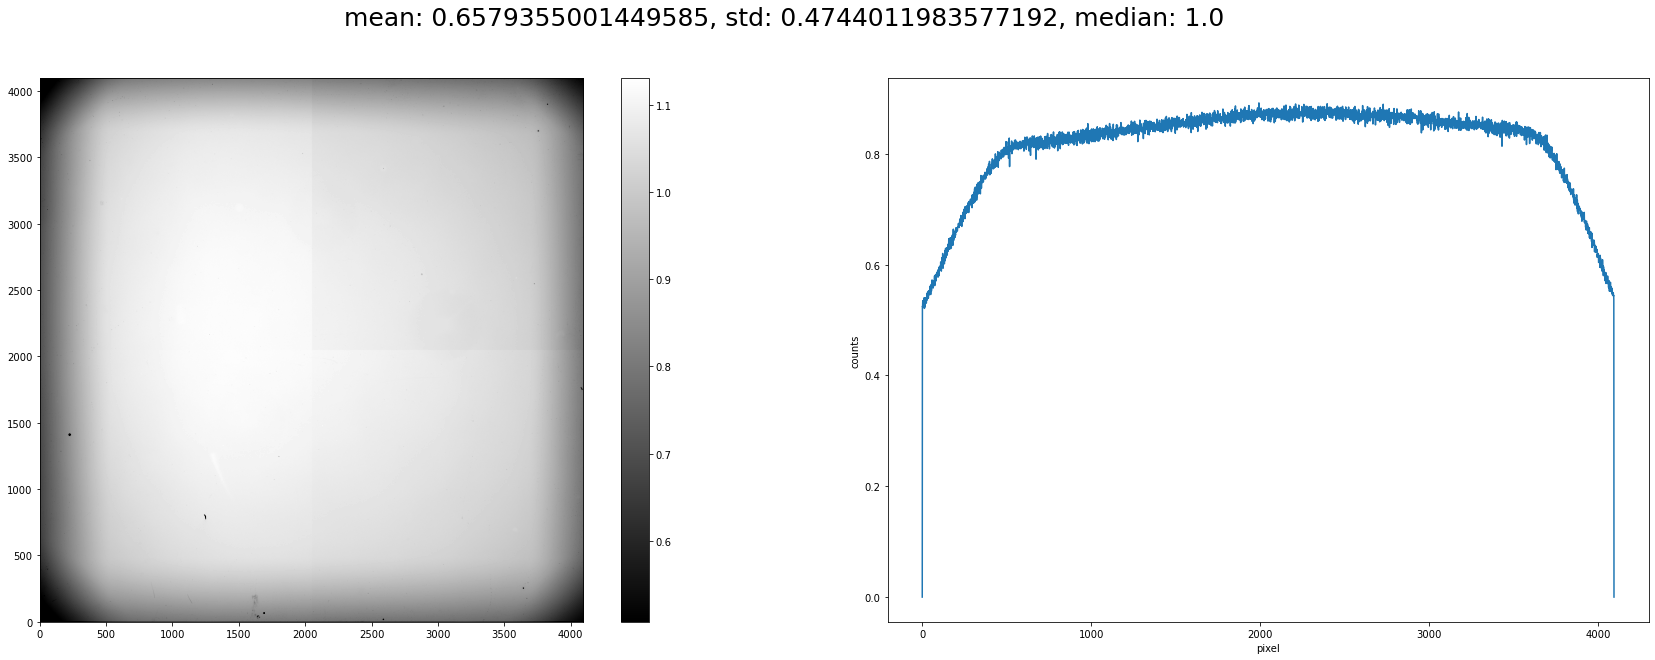

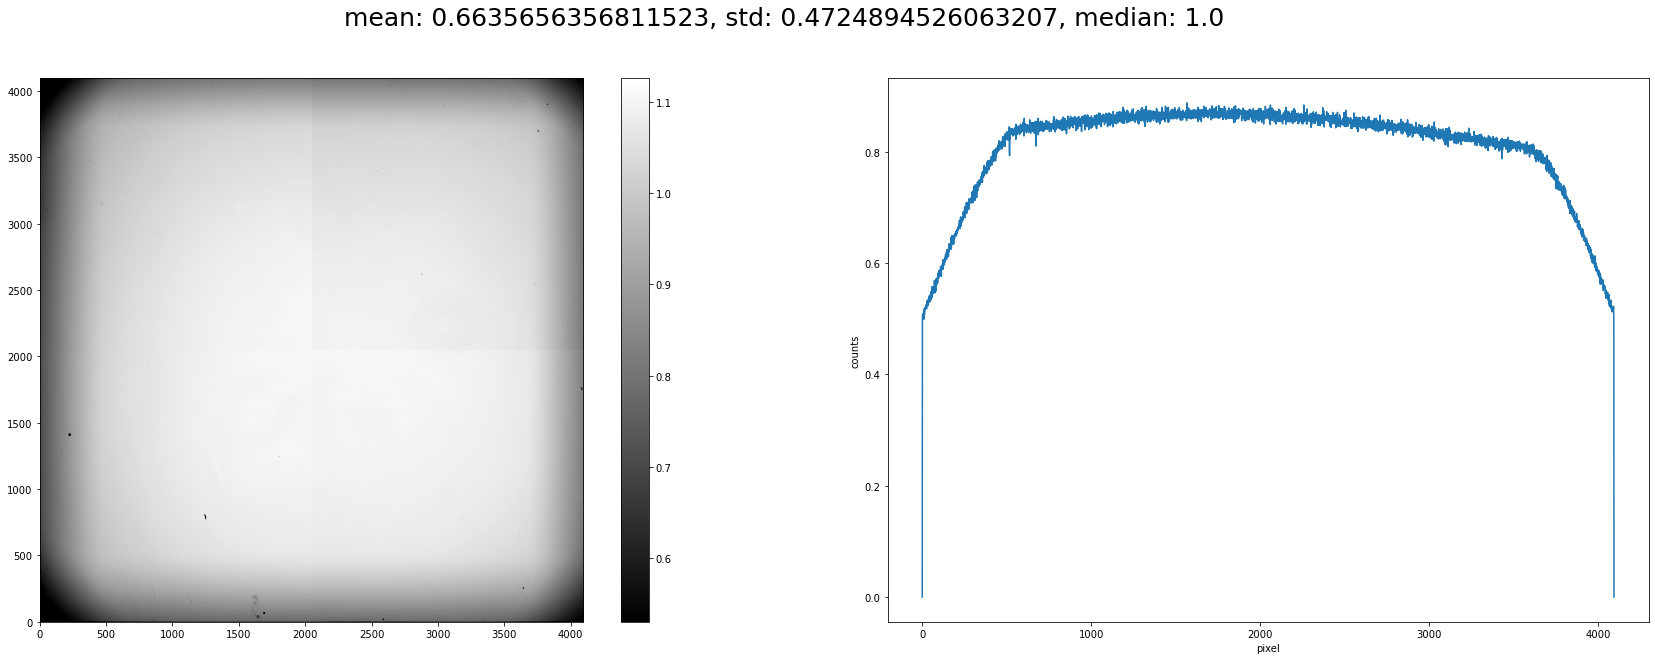

In [9]:
wiro.flat_div()

In [10]:
print(wiro)

All images: 
{ 'bad_images': [],
  'bias': ['a119.fit', 'a120.fit', 'a121.fit', 'a122.fit', 'a123.fit'],
  'dark': [ 'd001.fit', 'd002.fit', 'd003.fit', 'a106.fit', 'a114.fit',
            'a124.fit', 'a129.fit', 'a130.fit', 'a135.fit'],
  'flat_A 54195': ['f010.fit'],
  'flat_C 14859': ['f004.fit', 'f005.fit'],
  'flat_D 27981': ['f008.fit'],
  'flat_E 41102': ['f009.fit'],
  'flat_g 1736': ['f001.fit', 'f002.fit'],
  'sci_A 54195': ['a133.fit', 'a134.fit'],
  'sci_C 14859': [ 'a115.fit', 'a116.fit', 'a117.fit', 'a118.fit', 'a125.fit',
                   'a126.fit'],
  'sci_D 27981': ['a127.fit', 'a128.fit'],
  'sci_E 41102': ['a131.fit', 'a132.fit'],
  'sci_g 1736': [ 'a075.fit', 'a076.fit', 'a077.fit', 'a078.fit', 'a079.fit',
                  'a080.fit', 'a081.fit', 'a082.fit', 'a083.fit', 'a084.fit',
                  'a085.fit', 'a086.fit', 'a087.fit', 'a088.fit', 'a089.fit',
                  'a090.fit', 'a091.fit', 'a092.fit', 'a112.fit', 'a113.fit']}
Science filters: ['g 1736'